<a href="https://colab.research.google.com/github/Pritam-N/Linx/blob/master/Test_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
dataset = keras.datasets.imdb

In [0]:
(train_data,train_labels), (test_data,test_labels) = dataset.load_data()

In [15]:
train_data.shape

(25000,)

In [16]:
test_data.shape

(25000,)

In [0]:
word_index = dataset.get_word_index()

In [18]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [0]:
reverse_word_index

In [0]:
word_index = {k:(v+3) for k,v in word_index.items()}

In [0]:
word_index["<PAD>"] = 0

In [0]:
word_index["<PAD>"]

In [0]:
train_data[0]

In [0]:
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [0]:
def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [22]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [0]:
# A dictionary mapping words to an integer index
word_index = dataset.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [39]:
vocab_size = 100000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          1600000   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,600,289
Trainable params: 1,600,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 93us/step - loss: 0.6924 - acc: 0.5355 - val_loss: 0.6911 - val_acc: 0.6015
Epoch 2/40
15000/15000 [==============================] - 1s 70us/step - loss: 0.6891 - acc: 0.6336 - val_loss: 0.6874 - val_acc: 0.7201
Epoch 3/40
15000/15000 [==============================] - 1s 71us/step - loss: 0.6838 - acc: 0.7521 - val_loss: 0.6818 - val_acc: 0.7514
Epoch 4/40
15000/15000 [==============================] - 1s 71us/step - loss: 0.6760 - acc: 0.7896 - val_loss: 0.6740 - val_acc: 0.7690
Epoch 5/40
15000/15000 [==============================] - 1s 72us/step - loss: 0.6652 - acc: 0.8043 - val_loss: 0.6631 - val_acc: 0.7681
Epoch 6/40
15000/15000 [==============================] - 1s 71us/step - loss: 0.6506 - acc: 0.8088 - val_loss: 0.6491 - val_acc: 0.7821
Epoch 7/40
15000/15000 [==============================] - 1s 71us/step - loss: 0.6321 - acc: 0.8187 - val_loss: 0.6317 - val_acc

In [32]:
results = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 43us/step


In [33]:
print(results)

[0.3344138513469696, 0.87244]


In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

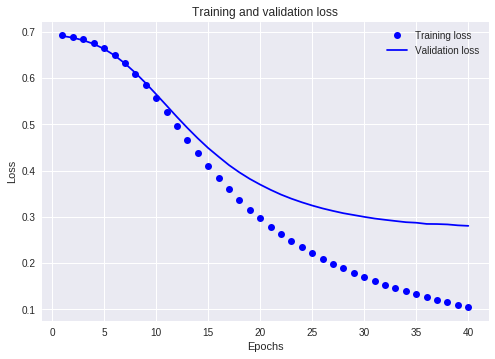

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

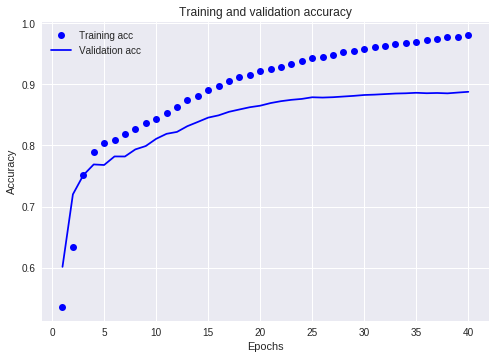

In [44]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=1024,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 60us/step - loss: 3.7544e-07 - acc: 1.0000 - val_loss: 1.1327 - val_acc: 0.8629
Epoch 2/40
15000/15000 [==============================] - 1s 62us/step - loss: 3.8036e-07 - acc: 1.0000 - val_loss: 1.1329 - val_acc: 0.8627
Epoch 3/40
15000/15000 [==============================] - 1s 63us/step - loss: 3.7371e-07 - acc: 1.0000 - val_loss: 1.1325 - val_acc: 0.8623
Epoch 4/40
15000/15000 [==============================] - 1s 70us/step - loss: 3.6858e-07 - acc: 1.0000 - val_loss: 1.1326 - val_acc: 0.8623
Epoch 5/40
15000/15000 [==============================] - 1s 68us/step - loss: 3.6539e-07 - acc: 1.0000 - val_loss: 1.1332 - val_acc: 0.8625
Epoch 6/40
15000/15000 [==============================] - 1s 68us/step - loss: 3.6334e-07 - acc: 1.0000 - val_loss: 1.1334 - val_acc: 0.8625
Epoch 7/40
15000/15000 [==============================] - 1s 68us/step - loss: 3.6110e-07 - acc: 1.0000 

KeyboardInterrupt: ignored